In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("Different_stores_dataset.csv")
df.head()

,invoice_no,invoice_date,customer_id,gender,age,category,quantity,selling_price_per_unit,cost_price_per_unit,payment_method,region,state,shopping_mall
0,I138884,10/30/2016 9:58,C241288,Female,28,Clothing,5,1500.40,1425.380,Credit Card,South,Kentucky,Kanyon
1,I317333,10/30/2016 9:58,C111565,Male,21,Shoes,3,1800.51,1620.459,Debit Card,South,Kentucky,Viaport Outlet
2,I127801,10/30/2016 9:58,C266599,Male,20,Clothing,1,300.08,295.060,Cash,West,California,Metrocity
3,I173702,10/30/2016 9:58,C988172,Female,66,Shoes,5,3000.85,2900.765,Credit Card,South,Florida,Metropol AVM
4,I337046,10/30/2016 9:59,C189076,Female,53,Books,4,60.60,45.450,Cash,South,Florida,Kanyon


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   invoice_no              99457 non-null  object 
 1   invoice_date            99457 non-null  object 
 2   customer_id             99457 non-null  object 
 3   gender                  99457 non-null  object 
 4   age                     99457 non-null  int64  
 5   category                99457 non-null  object 
 6   quantity                99457 non-null  int64  
 7   selling_price_per_unit  99457 non-null  float64
 8   cost_price_per_unit     99457 non-null  float64
 9   payment_method          99457 non-null  object 
 10  region                  99457 non-null  object 
 11  state                   99457 non-null  object 
 12  shopping_mall           99457 non-null  object 
 13  Total Sales             99457 non-null  float64
dtypes: float64(3), int64(2), object(9)
mem

### 1. Check missing values and duplicate records

In [ ]:
print("Missing values: ")
df.isnull().sum()

Missing values: 


invoice_no                0
invoice_date              0
customer_id               0
gender                    0
age                       0
category                  0
quantity                  0
selling_price_per_unit    0
cost_price_per_unit       0
payment_method            0
region                    0
state                     0
shopping_mall             0
dtype: int64

In [ ]:
print("Duplicate recorde: ", df[df.duplicated()].shape[0])

Duplicate recorde:  0


### 2. Add column name 'Total Sales'

In [ ]:
df["Total Sales"] = df["selling_price_per_unit"] * df["quantity"]
df.head(2)

,invoice_no,invoice_date,customer_id,gender,age,category,quantity,selling_price_per_unit,cost_price_per_unit,payment_method,region,state,shopping_mall,Total Sales
0,I138884,10/30/2016 9:58,C241288,Female,28,Clothing,5,1500.40,1425.380,Credit Card,South,Kentucky,Kanyon,7502.00
1,I317333,10/30/2016 9:58,C111565,Male,21,Shoes,3,1800.51,1620.459,Debit Card,South,Kentucky,Viaport Outlet,5401.53


### 3. How many customers have age more than 60?

In [ ]:
print("Customers having age more than 60: ",df[df["age"] > 60].shape[0])

Customers having age more than 60:  17169


### 4. How many unique customer_id entries are there? Do any customers make multiple purchases?

In [ ]:
print("Unique customer_id entries:",df["customer_id"].nunique())
print("Multiple purchases:", df[df["customer_id"].duplicated()].shape[0])


Unique customer_id entries: 99457
Multiple purchases: 0


### 5. Are there more male or female customers, Show in Pie Chart?

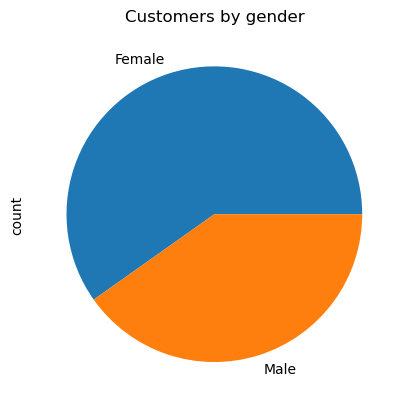

In [ ]:
df.gender.value_counts().plot(kind="pie")
plt.title("Customers by gender")
plt.show()

### 6. Which category is least popular among customers?

In [ ]:
print("Least popular category:", df.category.value_counts().idxmin())

Least popular category: Books


### 7. Which category has the highest sales volume?

In [ ]:
print("Highest sales volume:", df.category.value_counts().idxmax())

Highest sales volume: Clothing


### 8. Add column name 'Total Profit'

Total Profit=Total Sales−Total Costs

In [ ]:
df["Total Profit"] = df["Total Sales"] - (df["cost_price_per_unit"] * df["quantity"])
df.head(3)

,invoice_no,invoice_date,customer_id,gender,age,category,quantity,selling_price_per_unit,cost_price_per_unit,payment_method,region,state,shopping_mall,Total Sales,Total Profit
0,I138884,10/30/2016 9:58,C241288,Female,28,Clothing,5,1500.40,1425.380,Credit Card,South,Kentucky,Kanyon,7502.00,375.100
1,I317333,10/30/2016 9:58,C111565,Male,21,Shoes,3,1800.51,1620.459,Debit Card,South,Kentucky,Viaport Outlet,5401.53,540.153
2,I127801,10/30/2016 9:58,C266599,Male,20,Clothing,1,300.08,295.060,Cash,West,California,Metrocity,300.08,5.020


### 9. Display the top 10 invoices with the highest quantities sold?

In [ ]:
df.nlargest(10,"quantity")

,invoice_no,invoice_date,customer_id,gender,age,category,quantity,selling_price_per_unit,cost_price_per_unit,payment_method,region,state,shopping_mall,Total Sales,Total Profit
100,I283443,10/30/2016 10:21,C189493,Male,43,Technology,15,3150.00,2677.500,Credit Card,Central,Illinois,Viaport Outlet,47250.00,7087.500
109,I293215,10/30/2016 10:23,C166635,Male,18,Cosmetics,12,162.64,130.112,Credit Card,Central,Illinois,Istinye Park,1951.68,390.336
275,I282789,10/30/2016 11:02,C172185,Female,67,Cosmetics,12,81.32,76.924,Cash,West,Idaho,Istinye Park,975.84,52.752
305,I115679,10/30/2016 11:09,C266462,Male,27,Clothing,11,300.08,285.060,Cash,Central,Michigan,Kanyon,3300.88,165.220
61,I207205,10/30/2016 10:12,C716161,Female,33,Clothing,10,300.08,225.060,Debit Card,East,New York,Kanyon,3000.80,750.200
129,I160221,10/30/2016 10:28,C319231,Male,25,Clothing,10,900.24,675.180,Cash,West,Oregon,Mall of Istanbul,9002.40,2250.600
224,I353272,10/30/2016 10:50,C199311,Female,34,Clothing,10,300.08,292.060,Credit Card,East,Ohio,Istinye Park,3000.80,80.200
201,I286193,10/30/2016 10:45,C322994,Male,37,Cosmetics,9,121.98,118.485,Cash,West,Colorado,Istinye Park,1097.82,31.455
11,I139207,10/30/2016 10:00,C191708,Female,29,Books,8,15.15,15.105,Credit Card,West,Idaho,Zorlu Center,121.20,0.360
145,I246375,10/30/2016 10:32,C236365,Female,67,Cosmetics,8,81.32,56.924,Cash,West,Oregon,Kanyon,650.56,195.168


### 10. Which payment method is most commonly used?

In [ ]:
print("Most commonly used payment method:", df["payment_method"].value_counts().idxmax())

Most commonly used payment method: Cash


### 11. Total Sales with respect to region?

In [ ]:
df.groupby("region")["Total Sales"].mean()

region
Central    2545.715041
East       2553.545558
South      2508.204802
West       2506.849984
Name: Total Sales, dtype: float64

### 12. Sort Malls with average sales higher to lower?

In [ ]:
df.groupby("shopping_mall")["Total Sales"].mean().sort_values(ascending=False)

shopping_mall
Zorlu Center        2573.248351
Kanyon              2550.618396
Mall of Istanbul    2543.276766
Viaport Outlet      2523.835118
Istinye Park        2523.186677
Metropol AVM        2497.777108
Metrocity           2485.030133
Name: Total Sales, dtype: float64

### 13. Sort categories with the highest profit margins display in bar plot?

Profit Margin=(Total Sales/Total Profit)×100

category
Souvenir           28.077090
Food & Beverage    28.009421
Books              27.994478
Cosmetics          24.958546
Toys               24.953809
Clothing           16.999275
Shoes              11.897881
Technology         11.009808
Name: Profit Margin, dtype: float64


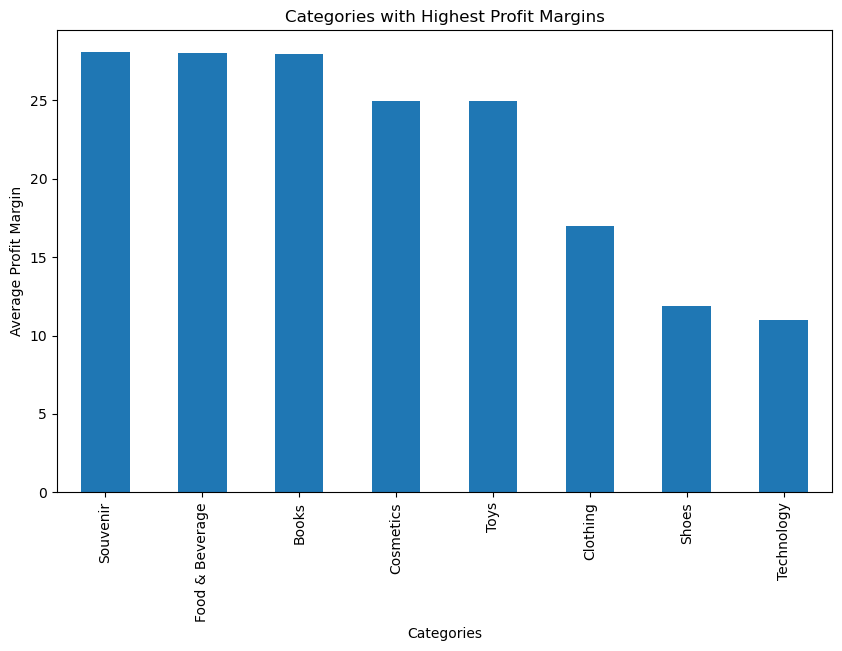

In [ ]:
df["Profit Margin"] = (df["Total Profit"]/df["Total Sales"])*100
sorted_categories_by_profit_margin = df.groupby('category')['Profit Margin'].mean().sort_values(ascending=False)
print(sorted_categories_by_profit_margin)

sorted_categories_by_profit_margin.plot(kind='bar',figsize=(10,6))
plt.title("Categories with Highest Profit Margins")
plt.xlabel("Categories")
plt.ylabel("Average Profit Margin")
plt.show()

### 14.  What is the total number of transactions per region for each payment method?

In [ ]:
df.groupby(["region","payment_method"]).size()

region   payment_method
Central  Cash              10319
         Credit Card        8140
         Debit Card         4640
East     Cash              12738
         Credit Card        9817
         Debit Card         5751
South    Cash               7227
         Credit Card        5698
         Debit Card         3284
West     Cash              14163
         Credit Card       11276
         Debit Card         6404
dtype: int64

### 15. How do sales in different categories compare between males and females?

gender                Female         Male
category                                 
Books              489420.75    345238.20
Clothing         68260097.84  45754397.92
Cosmetics         4068073.66   2728611.28
Food & Beverage    505322.60    344233.37
Shoes            39425167.30  27128284.17
Souvenir           382867.20    252957.45
Technology       34669950.00  23230200.00
Toys              2416046.08   1564380.16


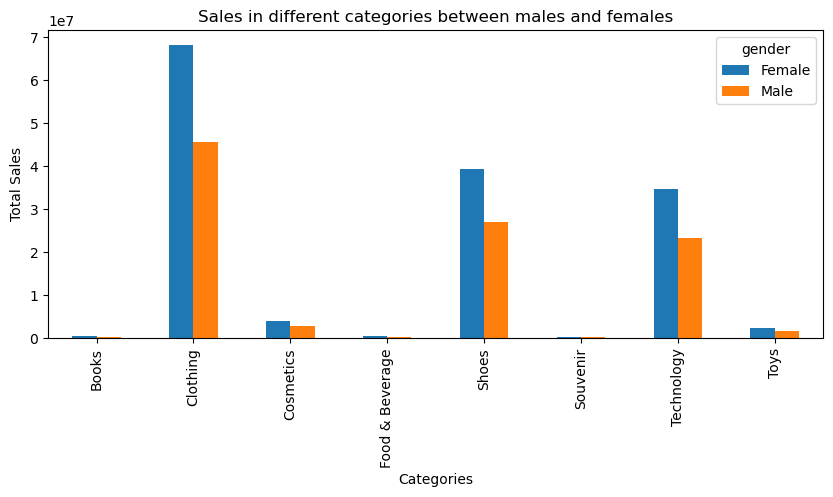

In [ ]:
sales = df.groupby(["category","gender"])["Total Sales"].sum().unstack()
print(sales)

sales.plot(kind="bar", figsize=(10,4))
plt.title("Sales in different categories between males and females")
plt.ylabel("Total Sales")
plt.xlabel("Categories")
plt.show()